In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import datetime
from sklearn import datasets, linear_model, metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline

In [25]:
# Part 1

df = pd.read_json('users.json')

# Sample has erroneous objects, removing any that won't fit our processing
if (df.isnull().values.any()):
    df = df[df['error'] != 'Permission denied']
    # .dropna() removes all rows wherein a variable is either missing or erroneous, causing a NaN marker which will screw up our processing.
    df = df.dropna(subset=['created','karma','submitted'], how='all')
    df = df.drop(['about', 'error', 'id'], axis=1)

# read_json() changes dtypes of 'created' and 'karma' to float64 for some reason
# Casting them to integers so we can actually use them
X_variables = df['created'].astype(int).values.reshape(-1,1)
Y_variables = df['karma'].astype(int).values.reshape(-1,1)
Z_variables = df['submitted'].astype(int).values.reshape(-1,1)

In [78]:
# Creating our training and test sample splits
X_train, X_test, Y_train, Y_test, Z_train, Z_test = sklearn.model_selection.train_test_split(X_variables, Y_variables, Z_variables, test_size=0.20, random_state=5)

regr = linear_model.LinearRegression()

# Training the linear regression model.
XZ_train = np.stack([X_train,Z_train], axis=1).reshape(-1,2)
XZ_test = np.stack([X_test,Z_test], axis=1).reshape(-1,2)


regr.fit(XZ_train,Y_train)

pred = regr.predict(XZ_test)

(7439, 2)


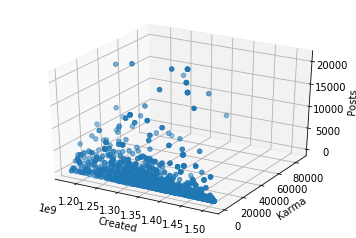

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(xs=X_test, ys=Y_test, zs=Z_test)
ax.set_xlabel('Created')
ax.set_ylabel('Karma')
ax.set_zlabel('Posts')



In [28]:
from math import sqrt

print('Test data MAE: ' + str(metrics.mean_absolute_error(Y_test,pred)))
print('Training data MAE: ' + str(metrics.mean_absolute_error(Y_train,regr.predict(XZ_train))))

print('Test data RMSE: ' + str(sqrt(metrics.mean_squared_error(Y_test,pred))))
print('Training data RMSE: ' + str(sqrt(metrics.mean_squared_error(Y_train,regr.predict(XZ_train)))))

print('Test data R: ' + str(metrics.r2_score(Y_test,pred)))
print('Training data R: ' + str(metrics.r2_score(Y_train,regr.predict(XZ_train))))

# RMSE gets the root of MSE, which was shown in assignment 5 through Pearson's R to be very effective with outliers.
# The added variable shows a much clearer correlation. Also, just to mention; Pearson moves positively to 1, not 0, as stated erronously last time.

Test data MAE: 1881.77653759
Training data MAE: 1764.12753535
Test data RMSE: 4802.906732149258
Training data RMSE: 4770.080814835201
Test data R: 0.718714074585
Training data R: 0.710063468929


In [110]:
# Part 2


folds = KFold(n_splits=10)

MAE_list = []
RMSE_list = []

for train_idx, test_idx in folds.split(X_variables, Y_variables, Z_variables):
    XZ_variables = np.stack([X_variables,Z_variables], axis=1).reshape(-1,2)
    XZ_train, XZ_test = XZ_variables[train_idx], XZ_variables[test_idx]
    Y_train, Y_test = Y_variables[train_idx], Y_variables[test_idx]
    
    lm = linear_model.LinearRegression()
    
    lm.fit(XZ_train, Y_train)
    
    pred = lm.predict(XZ_test)
    
    MAE = str(metrics.mean_absolute_error(Y_test,pred))
    RMSE = str(sqrt(metrics.mean_squared_error(Y_test,pred)))
    
    MAE_list.append(MAE)
    RMSE_list.append(RMSE)
    
    print("MAE: {0} - RMSE: {1}".format(MAE,RMSE))
    

MAE: 1591.68000068 - RMSE: 3334.552249265335
MAE: 1812.81216074 - RMSE: 4527.852669954321
MAE: 1820.37222788 - RMSE: 5096.989223276519
MAE: 1659.37330299 - RMSE: 3761.7286857114395
MAE: 1617.54678443 - RMSE: 4336.504650837717
MAE: 1985.21536731 - RMSE: 5430.989457210938
MAE: 1904.01750946 - RMSE: 4756.354507065233
MAE: 1603.83026461 - RMSE: 3979.335720692605
MAE: 2117.69508541 - RMSE: 6639.777765199323
MAE: 1759.35255138 - RMSE: 5186.751373833897


In [111]:
npMAE = np.array(MAE_list).astype(np.float)
npRMSE = np.array(RMSE_list).astype(np.float)

print("Average MAE: " + str(np.mean(npMAE)))
print("Average RMSE: " + str(np.mean(npRMSE)))

# Looking at the numbers, the K-fold cross-validation seems to be an improvement, albeit very slight.
# It is possible that our methodology of separating the sample into test and training data causes this,
# as we are not doing a brutish 80-20 split, but instead using SKLearn's train_test_split() method.
# Still, having the full sample instead of a subset of it does seem to improve its score, even if only marginally.

Average MAE: 1787.18952549
Average RMSE: 4705.0836303
